1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 5 spørgsmål:
1. mest tætbefolkede by
2. mindst tætbefolkede by
3. hvor meget er befolkningstætheden steget siden 2017 i Københavns Kommune
4. I hvor mange byer er arealet steget siden 2017
5. Hvor meget har befolkningstallet steget siden 2017 i Københavns Kommune




In [30]:
import pandas as pd
import numpy as np
URL = 'https://api.statbank.dk/v1/data/BY3/CSV?lang=en&delimiter=Semicolon&BYER=*&FOLKARTAET=BEFTAET&Tid=2019'

df = pd.read_csv(URL, delimiter=";")
# lave dataframe om til numpy array
data = np.array(df)
data = data[(data[:,3] != '0.0')]

result = ''
highest = 0
for d in data:
    if (float(d[3].replace('..', '0')) > highest):
        highest = float(d[3])
        result = d[0]

print('Highest city is {} with {}'.format(result, highest))

result = ''
lowest = float(data[:,3][0])
for d in data:
    if ('Rural areas' not in d[0]):
        if (float(d[3].replace('..', '999999')) < lowest):
            lowest = float(d[3])
            result = d[0]
            
print('Lowest city is {} with {}'.format(result, lowest))

Highest city is 147-01100 Frederiksberg (part of Greater Copenhagen Region) with 11939.8
Lowest city is 573-70404 Oksby with 55.3


dict_values([2486.1, 2495.9, 2513.0])
dict_values([39019.0, 39173.0, 39442.0])


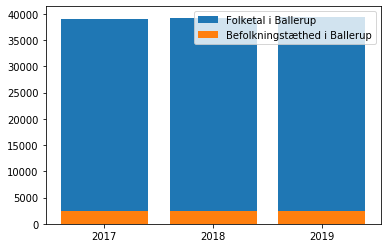

In [42]:
import matplotlib.pyplot as plt
URL = 'https://api.statbank.dk/v1/data/BY3/CSV?lang=en&delimiter=Semicolon&Tid=2017%2C2018%2C2019&BYER=15101100&FOLKARTAET=BEFTAET%2CFOLKETAL'

df = pd.read_csv(URL, delimiter=';')
data = np.array(df)

data_dict = {}
for d in data[(data[:,2] != 'Population')]:
    data_dict[d[0]] = d[3]

data2_dict = {}
for d in data[(data[:,2] == 'Population')]:
    data2_dict[d[0]] = d[3]



x_bar = data_dict.keys()
y_bar = data_dict.values()
y_bar2 = data2_dict.values()

print(y_bar)
print(y_bar2)


plt.xticks(list(x_bar))
plt.bar(x_bar, y_bar2, label = 'Folketal i Ballerup')
plt.bar(x_bar, y_bar, label = 'Befolkningstæthed i Ballerup')
plt.legend()


In [50]:
URL = 'https://api.statbank.dk/v1/data/BY3/CSV?lang=en&delimiter=Semicolon&Tid=2017%2C2019&FOLKARTAET=AREAL&BYER=*'

df = pd.read_csv(URL, delimiter=";")
data = np.array(df)
for d in data[(data[:,0]== 2017)]:
    if ('Rural areas' not in d[2]):
        d2 = data[(data[:,0] == 2019) & (data[:,2] == d[2])]
        if (d[3] != d2[0][3]):
            print('{} has cahnged from {} to {}'.format(d[2], d[3], d2[0][3]))

101-01100 København (part of Greater Copenhagen Region) has cahnged from 76.7 to 76.8
169-10201 Hedehusene has cahnged from 6.6 to 6.4
173-01100 Lyngby-Taarbæk (part of Greater Copenhagen Region) has cahnged from 18.4 to 18.3
185-01100 Tårnby (part of Greater Copenhagen Region) has cahnged from 13.7 to 13.6
201-10300 Blovstrød has cahnged from 1.3 to 1.4
210-18410 Fredensborg has cahnged from 4.7 to 4.8
219-10652 Hillerød (part of more than one municipality) has cahnged from 17.4 to 17.5
219-12960 Brødeskov has cahnged from 0.1 to 0.0
230-10303 Hørsholm (part of more than one municipality) has cahnged from 7.1 to 7.8
240-11263 Smørumovre has cahnged from 0.0 to 0.2
240-18767 Ølstykke-Stenløse has cahnged from 9.8 to 9.9
250-10190 Slangerup has cahnged from 3.2 to 3.3
259-10313 Køge has cahnged from 18.5 to 18.6
260-70124 Ølsted Strandhuse has cahnged from 0.4 to 0.0
265-10015 Gundsømagle has cahnged from 1.1 to 1.2
265-10040 Roskilde has cahnged from 21.7 to 21.2
270-70068 Bækkekrog ha